In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import fashion_mnist

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
print("The shape of Xtrain_images is ",x_train.shape)
print("The shape of Xtrain_labels is ",x_train.shape)
print("The shape of Ytrain_images is ",y_train.shape)

print("The shape of Xtest_images is ",x_test.shape)
print("The length of Xtest_labels is ",len(x_test))
y_train[0]

4423680/4422102 [==============================] - 0s 0us/step
The shape of Xtrain_images is  (60000, 28, 28)
The shape of Xtrain_labels is  (60000, 28, 28)
The shape of Ytrain_images is  (60000,)
The shape of Xtest_images is  (10000, 28, 28)
The length of Xtest_labels is  10000


9

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
# Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                padding='same',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                padding='same',
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3),  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [0]:
TEST_SIZE = 0.2
# RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128


In [9]:
train_model = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 3s 8ms/step - loss: 0.3765 - accuracy: 0.8662 - val_loss: 0.3932 - val_accuracy: 0.8534
Epoch 2/50
375/375 [==============================] - 3s 7ms/step - loss: 0.2307 - accuracy: 0.9146 - val_loss: 0.2628 - val_accuracy: 0.9047
Epoch 3/50
375/375 [==============================] - 3s 7ms/step - loss: 0.1798 - accuracy: 0.9327 - val_loss: 0.2584 - val_accuracy: 0.9099
Epoch 4/50
375/375 [==============================] - 3s 7ms/step - loss: 0.1440 - accuracy: 0.9460 - val_loss: 0.2583 - val_accuracy: 0.9109
Epoch 5/50
375/375 [==============================] - 3s 7ms/step - loss: 0.1129 - accuracy: 0.9574 - val_loss: 0.2719 - val_accuracy: 0.9131
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.0892 - accuracy: 0.9660 - val_loss: 0.2883 - val_accuracy: 0.9103
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.0776 - accuracy: 0.9705 - val_loss: 0.3516 - val_accuracy: 0.9103
Epoch 

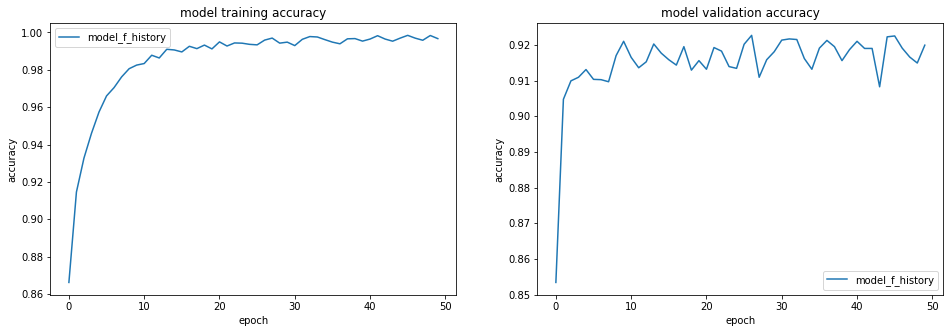

In [11]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(train_model.history["accuracy"])
#plt.plot(model_f_2_history.history["accuracy"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_f_history","model_f_history+dropout"])


ax2 = fig.add_subplot(1,2,2)
plt.plot(train_model.history["val_accuracy"])
#plt.plot(model_f_2_history.history["val_accuracy"])
plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_f_history","model_f_history+regulization"])
plt.show()